## 240 - Can we predict heights based on surface pressure?

[Youtube](https://www.youtube.com/watch?v=n1q8e4jGXaU)

In [1]:
from datetime import datetime, timedelta
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.calc as mpcalc
from siphon.simplewebservice.iastate import IAStateUpperAir
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_daily_stats(df):
    """
    Get basic stats from a sounding.
    """
    df_below_500 = df[df['pressure'] >= 500]
    df_below_500 = pandas_dataframe_to_unit_arrays(df_below_500, df.units)
    height_500 = np.nanmax(df_below_500['height'])
    mean_t = np.nanmean(df_below_500['temperature'])
    return height_500, np.nanmin(df_below_500['height']), np.nanmax(df_below_500['pressure']), mean_t

In [3]:
dates = [datetime(y, m, d) for m in range(1, 13) for y in [2019, 2020, 2021] for d in [1, 15, 25]]

In [4]:
heights_from_sounding = []
sounding_dates = []
sfc_pressure = []
sfc_height = []
layer_temp = []
station = 'DNR'

In [5]:
for d in dates:
    for i in range(5):
        print(d)
        try:
            df = IAStateUpperAir.request_data(d, station)
            h500, hsfc, psfc, meant = get_daily_stats(df)
            heights_from_sounding.append(h500)
            sfc_pressure.append(psfc)
            sfc_height.append(hsfc)
            layer_temp.append(meant)
            sounding_dates.append(d)
            break
        except Exception as e:
            print(f'Data issue - add a day! {e}')
            d = d + timedelta(days = i)
            continue

2019-01-01 00:00:00
2019-01-15 00:00:00
2019-01-25 00:00:00
2020-01-01 00:00:00
2020-01-15 00:00:00
2020-01-25 00:00:00
2021-01-01 00:00:00
2021-01-15 00:00:00
2021-01-25 00:00:00
2019-02-01 00:00:00
2019-02-15 00:00:00
2019-02-25 00:00:00
2020-02-01 00:00:00
2020-02-15 00:00:00
2020-02-25 00:00:00
2021-02-01 00:00:00
2021-02-15 00:00:00
2021-02-25 00:00:00
2019-03-01 00:00:00
2019-03-15 00:00:00
2019-03-25 00:00:00
2020-03-01 00:00:00
2020-03-15 00:00:00
2020-03-25 00:00:00
2021-03-01 00:00:00
2021-03-15 00:00:00
2021-03-25 00:00:00
2019-04-01 00:00:00
2019-04-15 00:00:00
2019-04-25 00:00:00
2020-04-01 00:00:00
2020-04-15 00:00:00
2020-04-25 00:00:00
2021-04-01 00:00:00
2021-04-15 00:00:00
2021-04-25 00:00:00
2019-05-01 00:00:00
2019-05-15 00:00:00
2019-05-25 00:00:00
2020-05-01 00:00:00
2020-05-15 00:00:00
2020-05-25 00:00:00
2021-05-01 00:00:00
2021-05-15 00:00:00
2021-05-25 00:00:00
2019-06-01 00:00:00
2019-06-15 00:00:00
2019-06-25 00:00:00
2020-06-01 00:00:00
2020-06-15 00:00:00


Text(0, 0.5, '500hPa height (m)')

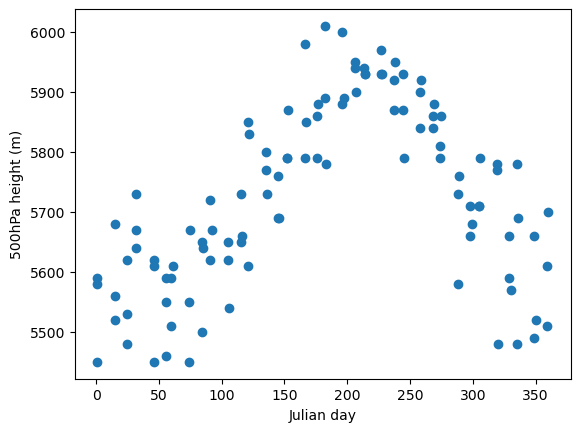

In [6]:
jd = [int(datetime.strftime(d, '%j')) for d in sounding_dates] # julian day
hf = [h.to('m') for h in heights_from_sounding]
plt.scatter(jd, hf)
plt.xlabel('Julian day')
plt.ylabel('500hPa height (m)')

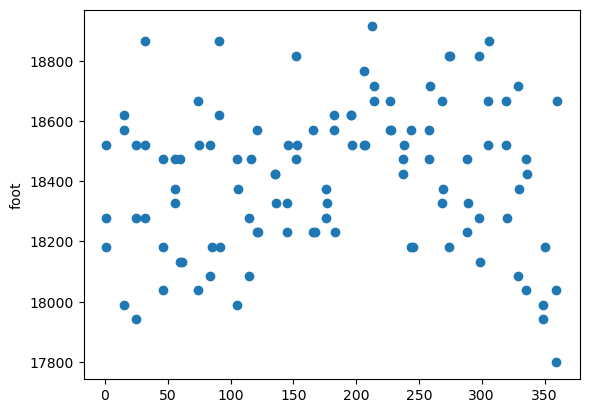

In [7]:
pressure_to_500 = [p - 500 * units.hPa for p in sfc_pressure]
heights_from_sfc_cond = [mpcalc.add_pressure_to_height(h, p).to('ft') for h, p in zip(sfc_height, pressure_to_500)]
plt.scatter(jd, heights_from_sfc_cond)

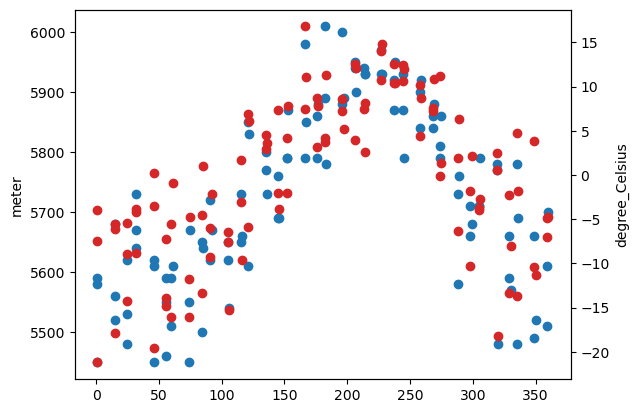

In [8]:
fig, ax = plt.subplots()
axb = ax.twinx()
ax.scatter(jd, hf)
axb.scatter(jd, layer_temp, color = 'tab:red')